In [3]:
import pandas as pd
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt


# Load data
data=pd.read_csv('MBA.csv')
data.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620,3,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680,5,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710,5,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690,6,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590,5,Consulting,NaN


C:\Users\coolw\AppData\Local\Temp\ipykernel_7524\2320952631.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")


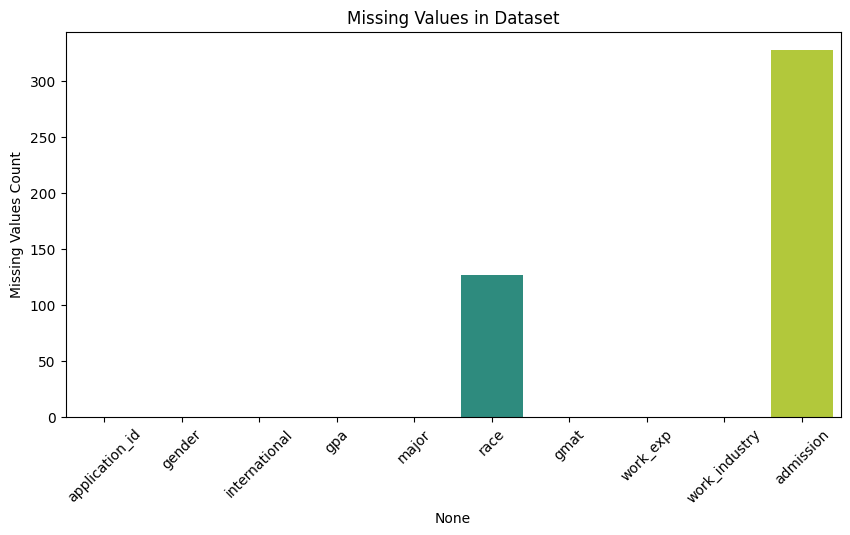

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check missing values
df=pd.read_csv('MBA.csv')
missing_values = df.isnull().sum()

# Plot missing values
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Missing Values Count")
plt.title("Missing Values in Dataset")
plt.show()

# Display missing values count
missing_values

# Drop missing values
df.dropna(inplace=True)

In [5]:
# Handle missing values

# Fill missing race values with the most frequent category (mode)
df['race'].fillna(df['race'].mode()[0], inplace=True)

# Drop rows where admission is missing (assuming it's the target variable)
df.dropna(subset=['admission'], inplace=True)

# Verify missing values after handling
df.isnull().sum()


C:\Users\coolw\AppData\Local\Temp\ipykernel_7524\1308499984.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['race'].fillna(df['race'].mode()[0], inplace=True)


application_id    0
gender            0
international     0
gpa               0
major             0
race              0
gmat              0
work_exp          0
work_industry     0
admission         0
dtype: int64

C:\Users\coolw\AppData\Local\Temp\ipykernel_7524\967804284.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['admission'], ax=axes[1, 1], palette="pastel")


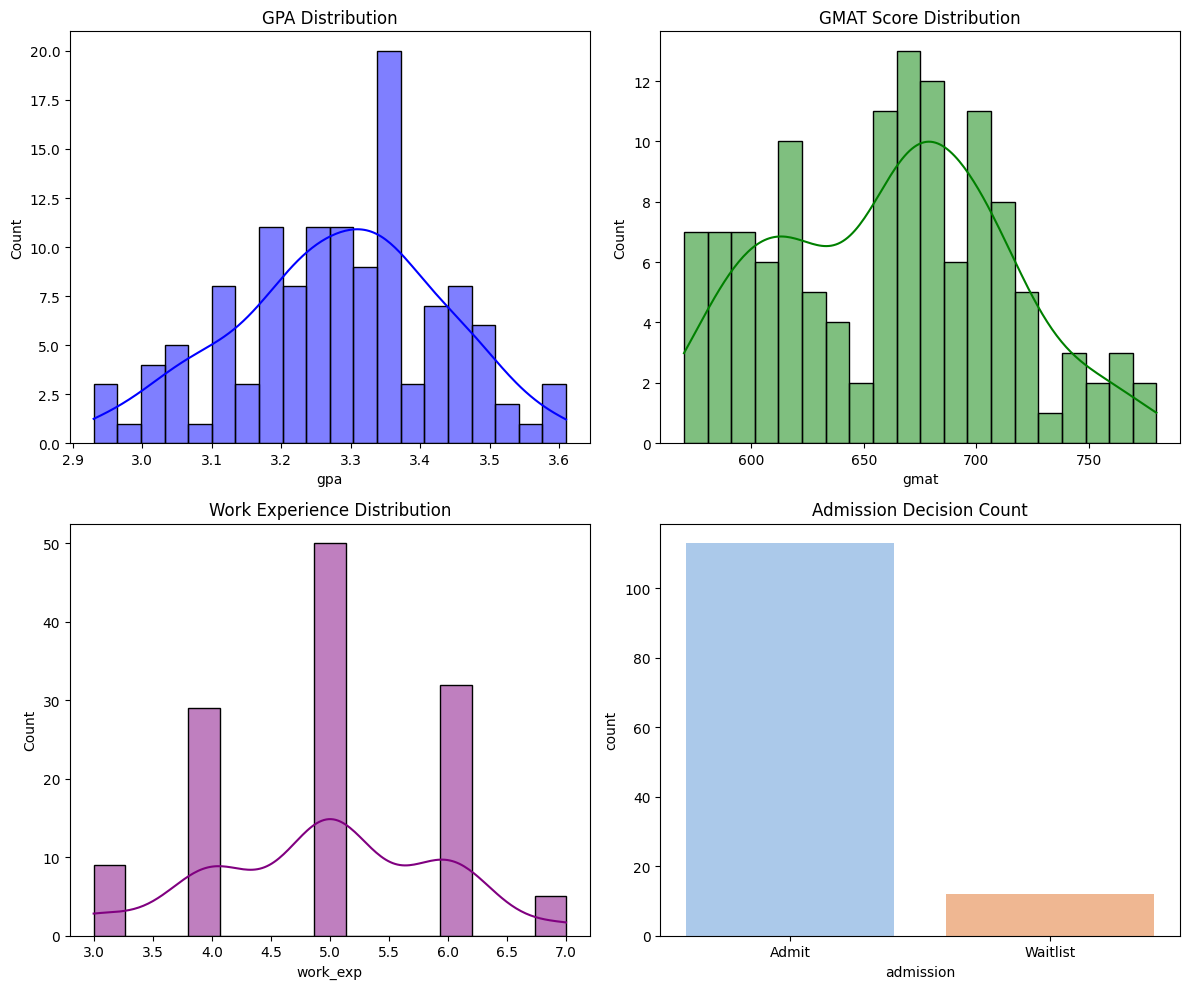

In [6]:
# Univariate Analysis: Visualizing distributions of numerical variables

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df['gpa'], kde=True, bins=20, ax=axes[0, 0], color="blue")
axes[0, 0].set_title("GPA Distribution")

sns.histplot(df['gmat'], kde=True, bins=20, ax=axes[0, 1], color="green")
axes[0, 1].set_title("GMAT Score Distribution")

sns.histplot(df['work_exp'], kde=True, bins=15, ax=axes[1, 0], color="purple")
axes[1, 0].set_title("Work Experience Distribution")

sns.countplot(x=df['admission'], ax=axes[1, 1], palette="pastel")
axes[1, 1].set_title("Admission Decision Count")

plt.tight_layout()
plt.show()


C:\Users\coolw\AppData\Local\Temp\ipykernel_7524\2958527954.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='admission', y='gpa', data=df, ax=axes[0], palette="coolwarm")
C:\Users\coolw\AppData\Local\Temp\ipykernel_7524\2958527954.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='admission', y='gmat', data=df, ax=axes[1], palette="coolwarm")
C:\Users\coolw\AppData\Local\Temp\ipykernel_7524\2958527954.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='admission', y='work_exp', data=df, ax=axes[2], palette="coolwarm")


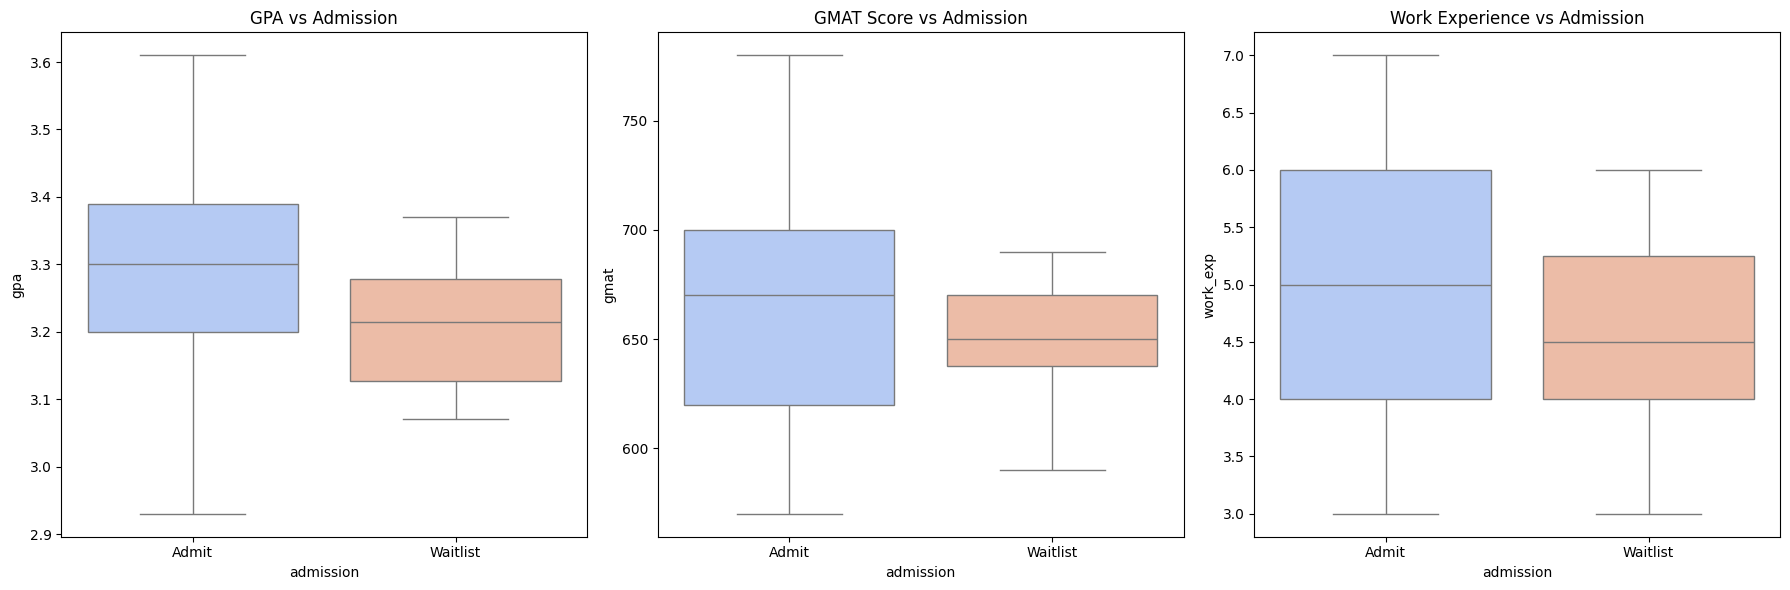

In [7]:
# Bivariate Analysis: Boxplots to compare numerical features against admission decisions

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='admission', y='gpa', data=df, ax=axes[0], palette="coolwarm")
axes[0].set_title("GPA vs Admission")

sns.boxplot(x='admission', y='gmat', data=df, ax=axes[1], palette="coolwarm")
axes[1].set_title("GMAT Score vs Admission")

sns.boxplot(x='admission', y='work_exp', data=df, ax=axes[2], palette="coolwarm")
axes[2].set_title("Work Experience vs Admission")

plt.tight_layout()
plt.show()


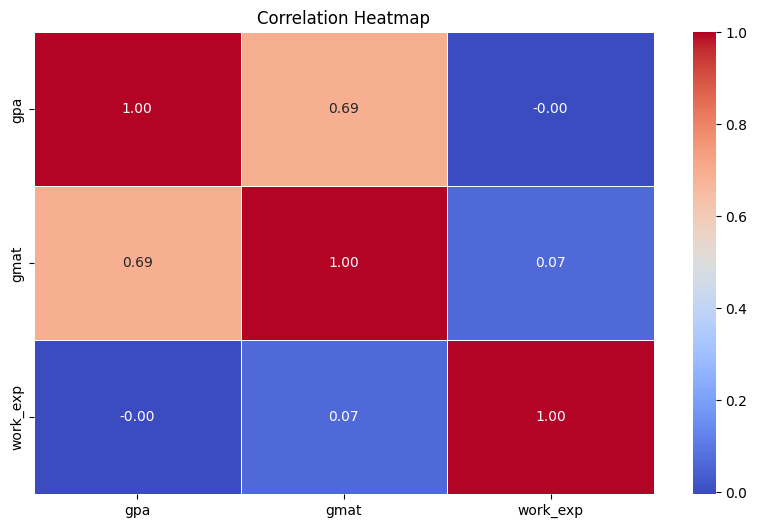

In [8]:
# Multivariate Analysis: Correlation Heatmap

plt.figure(figsize=(10, 6))
corr_matrix = df[['gpa', 'gmat', 'work_exp']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [9]:
# Drop the target column 'admission'
df_clustering = df.drop(columns=['admission'])

# Perform clustering using KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df_clustering['cluster'] = kmeans.fit_predict(df_clustering.select_dtypes(include=[float, int]))

# Display the first few rows of the clustered data
df_clustering.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,cluster
0,1,Female,False,3.30,Business,Asian,620,3,Financial Services,2
6,7,Female,False,2.93,STEM,Other,590,3,Technology,2
12,13,Female,False,3.24,Humanities,Hispanic,640,6,PE/VC,2
14,15,Female,False,3.03,STEM,White,600,5,Technology,2
16,17,Female,False,3.32,Business,Asian,710,5,PE/VC,2


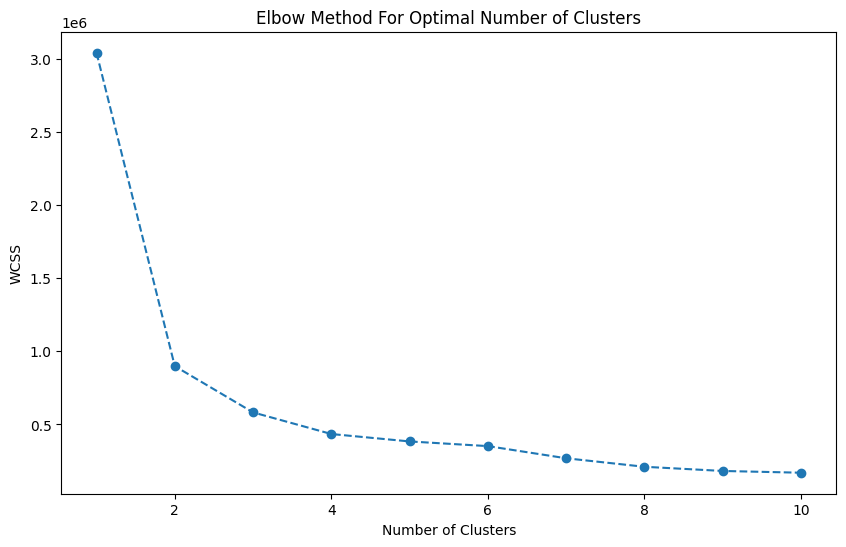

In [10]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_clustering.select_dtypes(include=[float, int]))
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(df_clustering.select_dtypes(include=[float, int]), df_clustering['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.4608432332104393


Cluster Centers:
   application_id       gpa        gmat  work_exp   cluster
0      184.105263  3.356842  688.947368  5.052632  0.105263
1      470.363636  3.309091  670.000000  4.636364  1.000000
2       20.000000  3.146667  613.333333  4.000000  2.000000
3      317.866667  3.395333  724.666667  4.866667  0.400000
4       52.187500  3.343125  701.875000  5.375000  2.000000
5      309.500000  3.194000  622.000000  5.400000  0.500000
6      211.875000  3.125000  602.500000  4.375000  0.000000
7      408.900000  3.196000  613.500000  4.900000  1.000000
8      110.384615  3.276923  639.230769  5.153846  2.000000
9      426.571429  3.344286  700.000000  5.142857  1.000000


C:\Users\coolw\AppData\Local\Temp\ipykernel_7524\2655555263.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=df_clustering, palette='viridis')


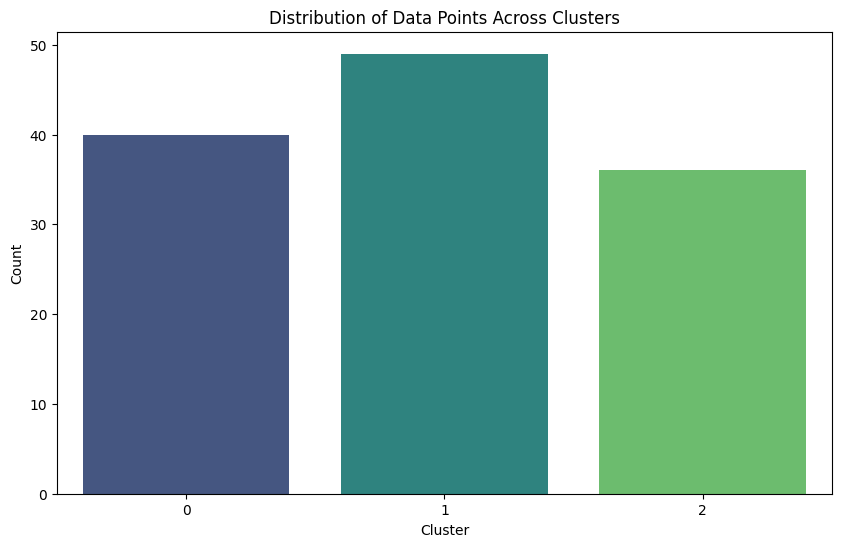

Cluster 0:
  application_id: 184.11
  gpa: 3.36
  gmat: 688.95
  work_exp: 5.05
  cluster: 0.11

Cluster 1:
  application_id: 470.36
  gpa: 3.31
  gmat: 670.00
  work_exp: 4.64
  cluster: 1.00

Cluster 2:
  application_id: 20.00
  gpa: 3.15
  gmat: 613.33
  work_exp: 4.00
  cluster: 2.00

Cluster 3:
  application_id: 317.87
  gpa: 3.40
  gmat: 724.67
  work_exp: 4.87
  cluster: 0.40

Cluster 4:
  application_id: 52.19
  gpa: 3.34
  gmat: 701.88
  work_exp: 5.38
  cluster: 2.00

Cluster 5:
  application_id: 309.50
  gpa: 3.19
  gmat: 622.00
  work_exp: 5.40
  cluster: 0.50

Cluster 6:
  application_id: 211.88
  gpa: 3.12
  gmat: 602.50
  work_exp: 4.38
  cluster: 0.00

Cluster 7:
  application_id: 408.90
  gpa: 3.20
  gmat: 613.50
  work_exp: 4.90
  cluster: 1.00

Cluster 8:
  application_id: 110.38
  gpa: 3.28
  gmat: 639.23
  work_exp: 5.15
  cluster: 2.00

Cluster 9:
  application_id: 426.57
  gpa: 3.34
  gmat: 700.00
  work_exp: 5.14
  cluster: 1.00



In [16]:
# Display cluster centers
cluster_centers = kmeans.cluster_centers_
cluster_centers_df = pd.DataFrame(cluster_centers, columns=df_clustering.select_dtypes(include=[float, int]).columns)
print("Cluster Centers:")
print(cluster_centers_df)

# Visualize the distribution of data points across clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=df_clustering, palette='viridis')
plt.title('Distribution of Data Points Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Interpretation of clusters
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i}:")
    for j, col in enumerate(df_clustering.select_dtypes(include=[float, int]).columns):
        print(f"  {col}: {center[j]:.2f}")
    print()

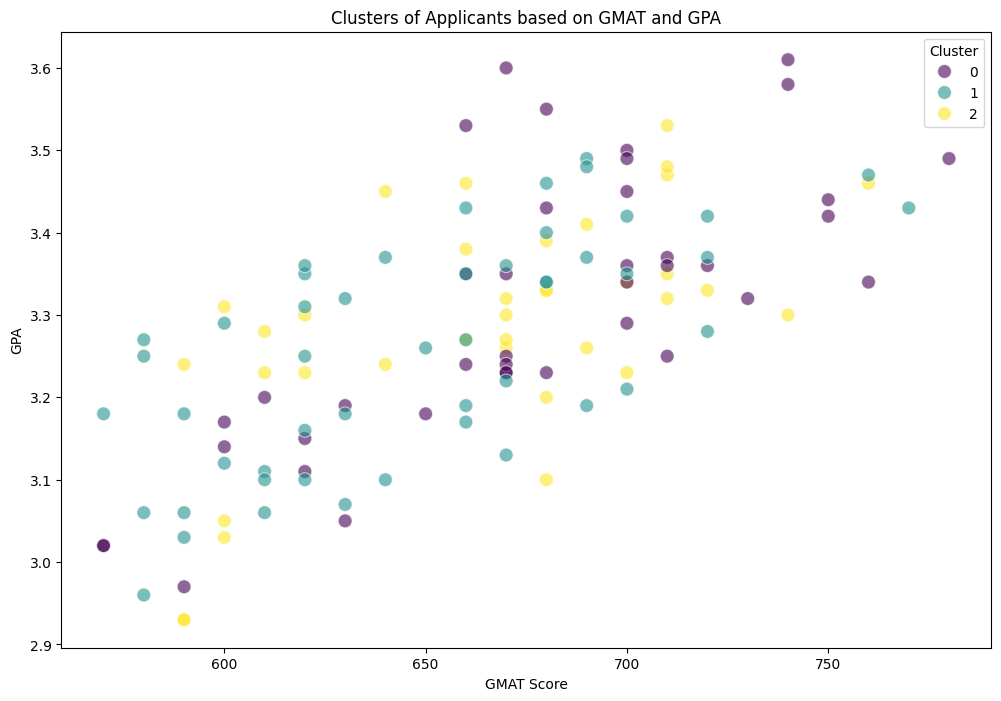

In [15]:
# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='gmat', y='gpa', hue='cluster', data=df_clustering, palette='viridis', s=100, alpha=0.6, edgecolor='w')
plt.title('Clusters of Applicants based on GMAT and GPA')
plt.xlabel('GMAT Score')
plt.ylabel('GPA')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Interpretation for Elbow Method
print("Interpretation of the Elbow Method:")
print("In this plot, the 'elbow' appears to be at k = 3, indicating that 3 clusters might be the optimal choice.\n")

#Interpretation of Silhouette Score
print("Interpretation of Silhouette Score:")
print("The Silhouette Score measures how similar an object is to its own cluster compared to other clusters.")
print("The score ranges from -1 to 1, where a higher value indicates better clustering.")
print("A score of 0.4608432332104393 suggests that the clusters are reasonably well-defined.")
print("Scores above 0.5 are generally considered good, while scores below 0.2 may indicate that the clusters are not well-separated.\n")

# Interpretation of Cluster Centers
print("Interpretation of Cluster Centers:")
print("The cluster centers represent the average values of the features for each cluster.")
print("Each row corresponds to a cluster, and each column corresponds to a feature.")
print("For example, the first cluster center has an average GPA of 3.36, an average GMAT score of 688.95, and an average work experience of 5.05 years.")
print("These values help in understanding the characteristics of each cluster.\n")

Interpretation of the Elbow Method:
In this plot, the 'elbow' appears to be at k = 3, indicating that 3 clusters might be the optimal choice.

Interpretation of Silhouette Score:
The Silhouette Score measures how similar an object is to its own cluster compared to other clusters.
The score ranges from -1 to 1, where a higher value indicates better clustering.
A score of 0.4608432332104393 suggests that the clusters are reasonably well-defined.
Scores above 0.5 are generally considered good, while scores below 0.2 may indicate that the clusters are not well-separated.

Interpretation of Cluster Centers:
The cluster centers represent the average values of the features for each cluster.
Each row corresponds to a cluster, and each column corresponds to a feature.
For example, the first cluster center has an average GPA of 3.36, an average GMAT score of 688.95, and an average work experience of 5.05 years.
These values help in understanding the characteristics of each cluster.

